In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/responses.csv', encoding='utf-8')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
df.isnull().sum().sum()

608

In [5]:
df.loc[df['Gender'] == "female", "sex_encode"] = 1
df.loc[df['Gender'] == "male", "sex_encode"] = 0

In [6]:
df["Gender"] = df["Gender"].map({"male": 0, "female":1})

In [7]:
df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'] ])

KeyError: 'Cabin'

In [10]:
music = df[['Gender','Music','Slow songs or fast songs','Dance','Folk','Country','Classical music',
            'Musical','Pop','Rock','Metal or Hardrock','Punk','Hiphop, Rap','Reggae, Ska',
            'Swing, Jazz','Rock n roll','Alternative','Latino','Techno, Trance','Opera']]
'''movie = 
hobby = 
phobia = 
health =
view = 
expenditure ='''
stat = df[['Age','Height','Weight','Number of siblings','sex_encode','Left - right handed',
        'Education','Only child','Village - town','House - block of flats']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2dfa7b50>,
      dtype=object)

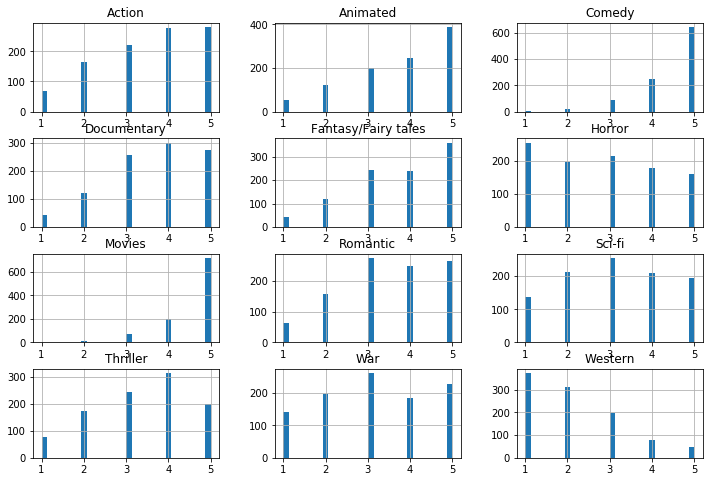

In [68]:
df.loc[:,'Movies':'Action'].hist(bins=30, figsize=(12,8))

In [63]:
df[["Gender","Dance"]].groupby('Gender').describe()

Dance                                             
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  591.0  3.150592  1.158314  1.0  2.0  3.0  4.0  5.0
male    409.0  3.048900  1.185102  1.0  2.0  3.0  4.0  5.0

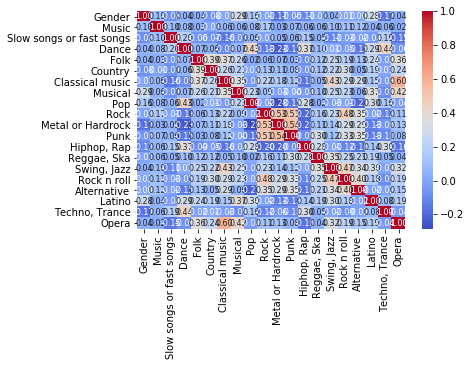

In [11]:
sns.heatmap(music.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",annot_kws={'size' : 8})

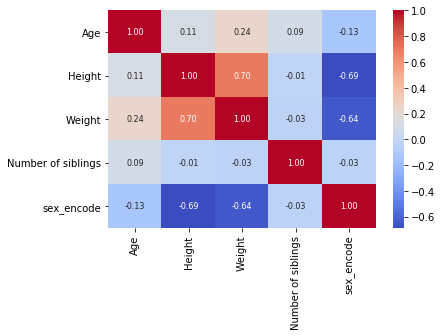

In [92]:
sns.heatmap(stat.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",annot_kws={'size' : 8})

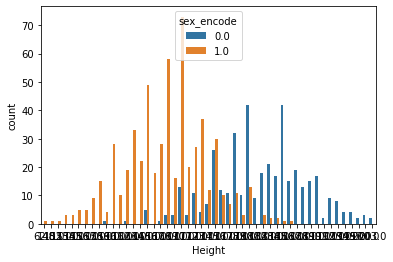

In [93]:
sns.countplot(data=df, x="Height", hue="sex_encode")

In [95]:
pd.pivot_table(df, index="Height", values="sex_encode")

,sex_encode
Height,
62.0,1.000000
148.0,1.000000
152.0,1.000000
153.0,1.000000
154.0,1.000000
155.0,1.000000
156.0,1.000000
157.0,1.000000
158.0,1.000000


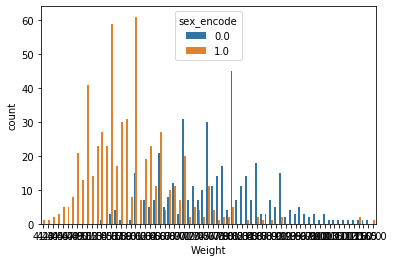

In [94]:
sns.countplot(data=df, x="Weight", hue="sex_encode")

In [96]:
pd.pivot_table(df, index="Weight", values="sex_encode")

,sex_encode
Weight,
41.0,1.000000
42.0,1.000000
43.0,1.000000
44.0,1.000000
45.0,1.000000
...,...
113.0,0.000000
120.0,0.666667
125.0,0.000000


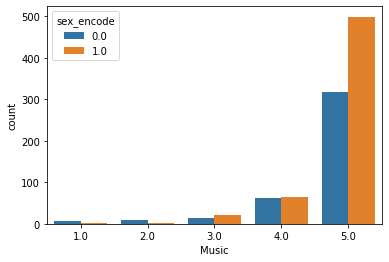

In [89]:
sns.countplot(data=df, x="Music", hue="sex_encode")

In [90]:
pd.pivot_table(df, index="Music", values="sex_encode")

,sex_encode
Music,
1.0,0.333333
2.0,0.181818
3.0,0.583333
4.0,0.507812
5.0,0.610771


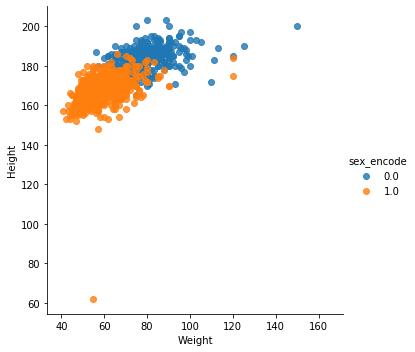

In [97]:
sns.lmplot(data=df, x="Weight", y="Height", hue="sex_encode", fit_reg=False)

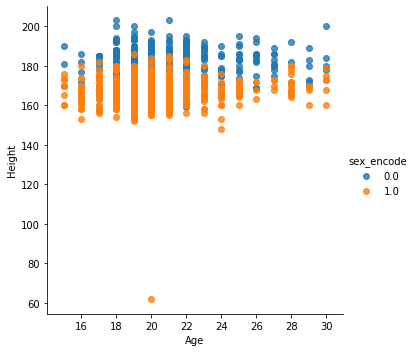

In [98]:
sns.lmplot(data=df, x="Age", y="Height", hue="sex_encode", fit_reg=False)

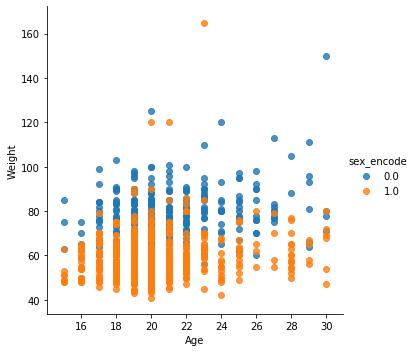

In [99]:
sns.lmplot(data=df, x="Age", y="Weight", hue="sex_encode", fit_reg=False)

In [ ]:
sns.catplot(x="아침_구매건수", hue="gender", col="gender",
                data=train, kind="count",
                height=30, aspect=.7)

In [ ]:
axis = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
axis.set(xlabel='경도', ylabel='위도')

In [ ]:
axis = train.plot(kind="scatter", x="custid", y="점심_구매건수", alpha=0.4,
    s=train["총구매액"]/100000, label="total_cost", figsize=(30,21),
    c="gender", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
axis.set(xlabel='id', ylabel='lunch')
plt.legend()

In [ ]:
g = sns.FacetGrid(train, col='gender')
g = g.map(sns.distplot, "아침_구매건수")

In [ ]:
g = sns.kdeplot(train["주말방문비율"][(train["gender"] == 0) & (train["주말방문비율"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["주말방문비율"][(train["gender"] == 1) & (train["주말방문비율"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("weekend")
g.set_ylabel("Frequency")
g = g.legend(["gender0","gender1"])

In [ ]:
g = sns.barplot(x="gender",y="아침_구매건수",data=train)
g = g.set_ylabel("weekend visit Probability")

In [ ]:
g = sns.factorplot(y="아침_구매건수",x="구매건수",hue="gender",size=15, data=train,kind="box")